## Springboard Capstone Project 1

## Airbnb New User Bookings

### Inferential Statistics

Gender Preference for Airbnb Bookings
In this section, we will be applying statistical tools to gain some inferences and insights into the kind of data we are dealing with and disovering relationships between various features of our dataset.

Does the gender of a person affect the first country s/he books an Airbnb in? To answer this question we will have to test the relationship between two categorical variables: Gender and Destination Country. Since the number of destination countries is multivariate, the Chi Square Square Significance Test.

We will consider only those users who have enlisted their gender as male or female. Unknown and other genders are not included in this analysis.

We do not consider users who have never booked an Airbnb or have booked in a country not enlisted as a class (NDF and Other).

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
sns.set_style('whitegrid')
plt.style.use('ggplot')
%matplotlib inline

In [4]:
# Load the data into DataFrames
df_train = pd.read_csv('train_users_2.csv')
df_test = pd.read_csv('test_users.csv')
sessions = pd.read_csv('sessions.csv')
df_agb = pd.read_csv('age_gender_bkts.csv')
countries = pd.read_csv('countries.csv')

In [5]:
df_agb[df_agb['year'].isnull()]
# there's no null value in age_gender_bkts.csv

,age_bucket,country_destination,gender,population_in_thousands,year


In [6]:
df_agb['gender'].value_counts()

male      210
female    210
Name: gender, dtype: int64

In [30]:
df_agb['age_bucket'].value_counts()

90-94    20
10-14    20
95-99    20
45-49    20
20-24    20
55-59    20
65-69    20
60-64    20
85-89    20
75-79    20
35-39    20
0-4      20
50-54    20
80-84    20
25-29    20
100+     20
15-19    20
5-9      20
40-44    20
70-74    20
30-34    20
Name: age_bucket, dtype: int64

The gender can also be turned into a categorical binary variable. Let us represent male with 0 and female with 1. Again, we do this just in case we require this variable to function as a numerical quantity. It must be stated that there is no immediate need for it and therefore, can be skipped.

In [8]:
df_agb['gender'] = df_agb['gender'].apply(lambda x: 0 if x == 'male' else 1)
df_agb['gender'].value_counts()

1    210
0    210
Name: gender, dtype: int64

In [9]:
df_agb['year'].value_counts()

2015.0    420
Name: year, dtype: int64

In [10]:
df_agb = df_agb.drop('year', axis=1)
df_agb.head()

,age_bucket,country_destination,gender,population_in_thousands
0,100+,AU,0,1.0
1,95-99,AU,0,9.0
2,90-94,AU,0,47.0
3,85-89,AU,0,118.0
4,80-84,AU,0,199.0


In [42]:
df_train = pd.read_csv('train_users_2.csv')
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [43]:
# replace these values with NaN to denote that we do not know the real age of these people.
df_train['age'] = df_train['age'].apply(lambda x: np.nan if x > 120 else x)

In [44]:
df_inf = df_train[(df_train['age'].notnull()) & (df_train['country_destination'] != 'NDF') & (df_train['country_destination'] != 'other') & (df_train['gender'] != 'OTHER') & (df_train['gender'].notnull())]
df_inf = df_inf[['id', 'gender', 'country_destination', 'age']]
df_inf.head()

,id,gender,country_destination,age
2,4ft3gnwmtx,FEMALE,US,56.0
4,87mebub9p4,-unknown-,US,41.0
6,lsw9q7uk0j,FEMALE,US,46.0
7,0d01nltbrs,FEMALE,US,47.0
8,a1vcnhxeij,FEMALE,US,50.0


In [103]:
df_inf['country_destination'].value_counts()

US    48241
FR     3681
IT     2018
GB     1761
ES     1693
CA     1066
DE      841
NL      594
AU      434
PT      156
Name: country_destination, dtype: int64

In [45]:
df_inf['gender'].value_counts()

FEMALE       26874
MALE         22947
-unknown-    10664
Name: gender, dtype: int64

In [46]:
df_inf['age'].value_counts()

30.0     3243
31.0     3115
32.0     3080
29.0     3065
28.0     3046
27.0     2935
33.0     2868
34.0     2590
26.0     2490
35.0     2409
25.0     2085
36.0     2078
37.0     1821
38.0     1686
24.0     1533
39.0     1436
40.0     1291
41.0     1208
23.0     1128
42.0     1013
44.0      973
45.0      970
43.0      954
46.0      849
22.0      760
105.0     738
47.0      728
50.0      619
48.0      611
51.0      598
         ... 
5.0         9
85.0        8
100.0       8
83.0        8
101.0       7
82.0        7
93.0        6
107.0       6
84.0        5
91.0        4
17.0        4
90.0        4
103.0       4
15.0        3
2.0         3
88.0        3
99.0        3
89.0        3
115.0       3
108.0       3
109.0       3
106.0       2
98.0        2
96.0        2
97.0        2
111.0       2
113.0       1
16.0        1
92.0        1
4.0         1
Name: age, Length: 101, dtype: int64

### Hypothesis Testing： Is there a significant difference between males and females mean age?

Null Hypothesis: There is no significant difference between males and females mean age when choosing U.S. for their country of destination.

Alternate Hypothesis: There is a significant difference between males and females mean age when choosing U.S. for their country of destination. 

We will assume our significance level, $\alpha$ to be 0.05.

In [104]:
df_inf.head()

,id,gender,country_destination,age
2,4ft3gnwmtx,FEMALE,US,56.0
4,87mebub9p4,-unknown-,US,41.0
6,lsw9q7uk0j,FEMALE,US,46.0
7,0d01nltbrs,FEMALE,US,47.0
8,a1vcnhxeij,FEMALE,US,50.0


In [105]:
df_inf.country_destination.describe()

count     60485
unique       10
top          US
freq      48241
Name: country_destination, dtype: object

In [50]:
df_inf.gender.describe()

count      60485
unique         3
top       FEMALE
freq       26874
Name: gender, dtype: object

In [106]:
df_inf.country_destination.unique()

array(['US', 'CA', 'FR', 'IT', 'GB', 'ES', 'NL', 'DE', 'AU', 'PT'], dtype=object)

In [48]:
df_inf.age.unique()

array([  56.,   41.,   46.,   47.,   50.,   36.,   33.,   31.,   29.,
         30.,   40.,   26.,   32.,   35.,   37.,   42.,   44.,   34.,
         19.,   52.,   57.,   49.,   54.,   28.,   69.,   43.,   39.,
         25.,   65.,   38.,   63.,   18.,    5.,   45.,   60.,   48.,
         51.,   61.,   64.,   70.,   67.,   55.,   73.,  104.,   66.,
        105.,   68.,   27.,   53.,   58.,   75.,   59.,   79.,   62.,
         72.,    4.,   24.,  101.,   98.,   74.,   23.,   87.,   92.,
         71.,   21.,   15.,   22.,   78.,   86.,  103.,   81.,   95.,
         82.,   77.,  107.,   85.,   17.,  115.,   83.,  110.,   20.,
        102.,   91.,   97.,   88.,  113.,   93.,  106.,   80.,  109.,
         76.,   96.,  108.,  100.,  111.,   90.,   99.,   89.,   84.,
          2.,   16.])

In [63]:
df_inf = pd.DataFrame(df_inf)
df_inf.to_csv('inferential_statistics.csv')

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy.stats import norm
import scipy.stats
import math

In [78]:
# Male Age
men = df_inf[df_inf.gender == 'MALE']
print(men.shape)
men.head()

(22947, 4)


,id,gender,country_destination,age
21,qsibmuz9sx,MALE,US,30.0
58,fp6ndcm5ak,MALE,US,52.0
64,0xvbruzuzz,MALE,CA,35.0
85,6qx6xl5eho,MALE,US,33.0
96,4ktx9s53w5,MALE,US,34.0


In [109]:
men_mean_age = men.age.mean()
print(men_mean_age)

men_std_age = men.age.std()
print(men_std_age)

37.02897982307056
12.46880134889663


In [83]:
# Female Age
female = df_inf[df_inf.gender == 'FEMALE']
print(female.shape)
female.head()

(26874, 4)


,id,gender,country_destination,age
2,4ft3gnwmtx,FEMALE,US,56.0
6,lsw9q7uk0j,FEMALE,US,46.0
7,0d01nltbrs,FEMALE,US,47.0
8,a1vcnhxeij,FEMALE,US,50.0
10,yuuqmid2rp,FEMALE,US,36.0


In [115]:
female_mean_age = female.age.mean()
print(female_mean_age)

female_std_age = female.age.std()
print(female_std_age)

36.19301183299844
12.926534510264961


In [142]:
# Diference in mean of Male and Female age

mean_diff = men_mean_age - female_mean_age
print("Mean difference is:", mean_diff)

# Standard Error Calculation

SE=((men_std_age**2)/22947 + (female_std_age**2)/26874)**0.5
print("Standard error is:", SE)

Mean difference is: 0.8359679900721204
Standard error is: 0.11398663147877403


In [143]:
# Use 0.05 Significance level in two sample t-test
t_val=((men_mean_age - female_mean_age)-0)/SE
print(t_val)

# two-sided pvalue = Prob(abs(t)>tt)
p_value = stats.t.sf(np.abs(2.29), 128)*2  
print(p_value)

7.333912575772448
0.023657711289


In [88]:
if p_value < 0.05:
    print('Ho that mean of female and male age are the same will be rejected.')
    print('There is significance difference between male and female mean age.')
else: 
    print('Ho: Mean of female and male age are the same IS TRUE!')

Ho that mean of female and male age are the same will be rejected.
There is significance difference between male and female mean age.


### Hypothesis Testing： Is there a significant difference between males and females mean age?

Null Hypothesis: There is no significant difference between males and females mean age when choosing U.S. for their country of destination.

Alternate Hypothesis: There is a significant difference between males and females mean age when choosing U.S. for their country of destination. 

We will assume our significance level, $\alpha$ to be 0.05.

In [144]:
len(us)

48241

In [119]:
us = df_inf[df_inf.country_destination == 'US']
print(us.shape)
us.head()

(48241, 4)


,id,gender,country_destination,age
2,4ft3gnwmtx,FEMALE,US,56.0
4,87mebub9p4,-unknown-,US,41.0
6,lsw9q7uk0j,FEMALE,US,46.0
7,0d01nltbrs,FEMALE,US,47.0
8,a1vcnhxeij,FEMALE,US,50.0


In [135]:
us_female = us[us.gender == 'FEMALE']
print(us_female.shape)

(21194, 4)


In [136]:
us_male = us[us.gender == 'MALE']
print(us_male.shape)

(18435, 4)


In [120]:
us_mean_age = us.age.mean()
print(us_mean_age)

36.90182624738293


In [121]:
us_female_mean_age = us[us.gender == 'FEMALE'].age.mean()
print(us_female_mean_age)

us_female_std_age = us[us.gender == 'FEMALE'].age.std()
print(us_female_std_age)

36.124469189393224
12.855316909871457


In [122]:
us_male_mean_age = us[us.gender == 'MALE'].age.mean()
print(us_male_mean_age)

us_male_std_age = us[us.gender == 'MALE'].age.std()
print(us_male_std_age)

36.71250339029021
12.180975629966845


In [139]:
# Difference in mean of Male and Female age when choose US for country destination

mean_diff = us_male_mean_age - us_female_mean_age
print("Mean difference is:", mean_diff)

# Standard Error Calculation

SE=((us_male_std_age**2)/18435 + (us_female_std_age**2)/21194)**0.5
print("Standard error is:", SE)

Mean difference is: 0.5880342008969848
Standard error is: 0.12588114673636702


In [146]:
# Use 0.05 Significance level in two sample t-test
t_val=((us_male_mean_age - us_female_mean_age)-0)/SE
print(t_val)

# two-sided pvalue = Prob(abs(t)>tt)
p_value = stats.t.sf(np.abs(2.29), 48241)*2
print(p_value)

5.158799705441645
0.022025612408


In [131]:
if p_value < 0.05:
    print('Ho: when choosing U.S. for country of destination the mean of female and male age are the same will be REJECTED.\n')
    print('There is significance difference between male and female mean age when choosing U.S. for country of destination.\n')
else:
    print('Ho: when choosing U.S. for country of destination the mean of female and male age are the same IS TRUE!')

Ho: when choosing U.S. for country of destination the mean of female and male age are the same will be REJECTED.

There is significance difference between male and female mean age when choosing U.S. for country of destination.



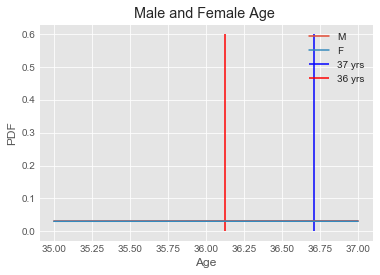

In [149]:
# Normal Distribution graph of Male and Female Age
import pylab
x = np.linspace(35,37,40)
y1 = stats.norm.pdf(x, loc=men_mean_age, scale=men_std_age)
pylab.plot(x,y1)

y2 = stats.norm.pdf(x, loc=female_mean_age, scale=female_std_age)
pylab.plot(x,y2)
pylab.xlabel('Age')
pylab.ylabel('PDF')
pylab.vlines(us_male_mean_age, 0, 0.6, color='blue')
pylab.vlines(us_female_mean_age, 0, 0.6, color='red')
pylab.legend(['M', 'F', '37 yrs', '36 yrs'])
pylab.title('Male and Female Age ')
pylab.show()

In [16]:
chi2, p, dof, expected = stats.chi2_contingency(observed)
chi2

176.12475432418529

In [17]:
p

5.6057373970830885e-28

#### Result
The p-value that we have obtained is less than our chosen significance level. 

Therefore, we reject the null hypothesis and accept the negating alterate hypothesis. 

There is a relationship between country preference and the sex of the customer. 